In [1]:
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('MDWBS_LEAD_REF_output_data.csv')

# Check column names
print(data.columns)

# Remove duplicates based on the correct column name
data = data.drop_duplicates(subset='GeneratedSMILES')

data.head()


Index(['GeneratedSMILES', 'SimilarityToReference', 'ESP', 'shape',
       'MolecularWeight', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'MolLogP',
       'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity',
       'OverallSimilarityToReference', 'Folder'],
      dtype='object')


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
0,CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(C(=O)C2CC2...,0.211009,0.337810,0.443525,394.490,1,2,49.41,3.8000,6,4,3.8000,110.5777,0.001477,B2_Ref_Asinex_param
1,CNC(=O)C1(Cc2ccccc2-c2cccc(C(F)(F)F)c2)CCN(C(=...,0.194690,0.380453,0.474696,444.497,1,2,49.41,4.6797,6,4,4.6797,115.6217,0.001746,B2_Ref_Asinex_param
2,CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(S(C)(=O)=O...,0.200000,0.403530,0.438452,404.507,1,3,66.48,2.8230,7,3,2.8230,107.6905,0.001661,B2_Ref_Asinex_param
3,CC(C)NC(=O)C1(Cc2ccc(-c3ccccc3I)cc2)CCN(C(=O)C...,0.203390,0.468926,0.503761,560.476,1,3,58.64,4.8131,8,4,4.8131,138.7987,0.001921,B2_Ref_Asinex_param
4,CN(C)C(=O)Cc1c(-c2ccc(Cl)cc2Cl)c(-c2ccccc2I)nn1C,0.203704,0.326943,0.398124,514.194,0,3,38.13,5.2962,7,3,5.2962,119.2150,0.001772,B2_Ref_Asinex_param


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 95
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GeneratedSMILES               91 non-null     object 
 1   SimilarityToReference         91 non-null     float64
 2   ESP                           91 non-null     float64
 3   shape                         91 non-null     float64
 4   MolecularWeight               91 non-null     float64
 5   NumHDonors                    91 non-null     int64  
 6   NumHAcceptors                 91 non-null     int64  
 7   TPSA                          91 non-null     float64
 8   MolLogP                       91 non-null     float64
 9   NumRotatableBonds             91 non-null     int64  
 10  NumRings                      91 non-null     int64  
 11  ClogP                         91 non-null     float64
 12  MolarRefractivity             91 non-null     float64
 13  Overall

In [4]:
data.describe()

,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.206263,0.369664,0.464560,414.233209,1.252747,3.956044,71.381319,3.513203,6.175824,3.703297,3.513203,111.771142,0.005546
std,0.041317,0.081989,0.049098,97.620936,0.949777,1.548563,25.885671,1.536985,2.373902,0.888125,1.536985,25.770576,0.017354
min,0.103093,0.135496,0.236160,114.192000,0.000000,2.000000,15.270000,-1.684700,1.000000,1.000000,-1.684700,34.418800,0.000315
25%,0.187748,0.321997,0.436923,383.911000,1.000000,3.000000,53.040000,2.765810,5.000000,3.000000,2.765810,104.623900,0.001377
50%,0.215517,0.376721,0.472603,419.569000,1.000000,4.000000,64.170000,3.559180,6.000000,4.000000,3.559180,117.648700,0.001895
75%,0.235316,0.420872,0.495160,455.975000,1.000000,5.000000,84.190000,4.534450,8.000000,4.000000,4.534450,125.713700,0.002606
max,0.273585,0.563779,0.552779,677.557000,4.000000,9.000000,146.950000,7.224800,12.000000,6.000000,7.224800,185.343800,0.114779


In [5]:
max_similarity_index = data['OverallSimilarityToReference'].idxmax()
max_similarity_row = data.loc[max_similarity_index]
print(f"The row with the maximum value in 'OverallSimilarityToReference' column:")
print(max_similarity_row)
max_similarity_row.GeneratedSMILES

The row with the maximum value in 'OverallSimilarityToReference' column:
GeneratedSMILES                 COCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3c(F)cccc3I)c(...
SimilarityToReference                                                    0.230769
ESP                                                                      0.480665
shape                                                                    0.448918
MolecularWeight                                                           540.377
NumHDonors                                                                      1
NumHAcceptors                                                                   5
TPSA                                                                        84.42
MolLogP                                                                   3.37074
NumRotatableBonds                                                               9
NumRings                                                                        3
ClogP                    

'COCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3c(F)cccc3I)c(C)n2)C1'

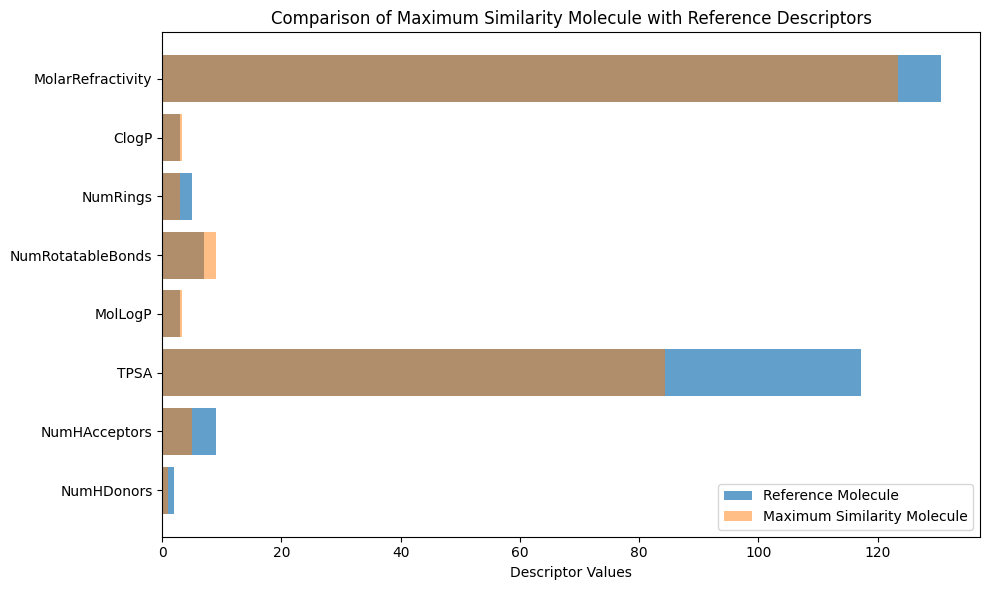

In [6]:

# Data for the molecule with the maximum value in 'OverallSimilarityToReference' column
max_similarity_row = data.loc[data['OverallSimilarityToReference'].idxmax()]

# Reference Descriptors
reference_descriptors = {
    'NumHDonors': 2,
    'NumHAcceptors': 9,
    'TPSA': 117.18,
    'MolLogP': 3.0549,
    'NumRotatableBonds': 7,
    'NumRings': 5,
    'ClogP': 3.0549,
    'MolarRefractivity': 130.6471
}

# Extracting relevant descriptors
reference_data = [reference_descriptors[key] for key in reference_descriptors]
molecule_data = [
    max_similarity_row['NumHDonors'],
    max_similarity_row['NumHAcceptors'],
    max_similarity_row['TPSA'],
    max_similarity_row['MolLogP'],
    max_similarity_row['NumRotatableBonds'],
    max_similarity_row['NumRings'],
    max_similarity_row['ClogP'],
    max_similarity_row['MolarRefractivity']
]

# Descriptor labels
descriptors = list(reference_descriptors.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(descriptors, reference_data, label='Reference Molecule', alpha=0.7)
plt.barh(descriptors, molecule_data, label='Maximum Similarity Molecule', alpha=0.5)
plt.xlabel('Descriptor Values')
plt.title('Comparison of Maximum Similarity Molecule with Reference Descriptors')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Assuming 'data' is your DataFrame

# Filtering and sorting the DataFrame by 'OverallSimilarityToReference' for top 20 values
best_5 = data.sort_values('OverallSimilarityToReference', ascending=False)[:5]

# Extracting top 5 SMILES from the 'GeneratedSMILES' column
top_5_smiles = best_5['GeneratedSMILES'].tolist()

# Exporting to a text file
with open('top_5_smiles_MDWBS_LEAD_REF.txt', 'w') as file:
    for smile in top_5_smiles:
        file.write(smile + '\n')

# Displaying the first two SMILES for verification
print(top_5_smiles[0])  # First SMILE
print(top_5_smiles[1])  # Second SMILE

# Displaying the DataFrame of top 5 for reference
best_5


COCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3c(F)cccc3I)c(C)n2)C1
Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1c(F)cccc1F


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
86,COCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3c(F)cccc3I)c(...,0.230769,0.480665,0.448918,540.377,1,5,84.42,3.37074,9,3,3.37074,123.3877,0.114779,B2_lead_smile_Asinex_param
85,Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1c(F...,0.227273,0.563779,0.474885,428.483,1,4,75.19,3.66884,7,4,3.66884,111.4767,0.083844,B2_lead_smile_Asinex_param
88,Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1ccc...,0.236364,0.523569,0.473129,410.493,1,4,75.19,3.52974,7,4,3.52974,111.5187,0.074622,B2_lead_smile_Asinex_param
9,CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(C(=O)c2cnc...,0.241071,0.325848,0.514750,432.499,1,4,75.19,3.49380,6,4,3.49380,119.2092,0.060817,B2_Ref_Asinex_param
66,CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(S(=O)(=O)c2cc...,0.256410,0.322947,0.450932,535.670,1,7,104.73,2.73980,8,5,2.73980,145.1385,0.005571,B2_lead_param_Ref_Asinex_param


In [8]:
data.sort_values('SimilarityToReference', ascending=False)[11:20]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
71,CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(S(=O)(=O)c...,0.243697,0.410208,0.469495,552.672,1,6,91.84,3.4839,8,5,3.4839,147.3015,0.003511,B2_lead_param_Ref_Asinex_param
6,CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(C(=O)c2ccn...,0.243243,0.421470,0.488696,421.472,1,4,75.44,3.6918,6,4,3.6918,113.6802,0.002471,B2_Ref_Asinex_param
10,Cn1cc(-c2ccncc2)c(-c2ccc(OCCCN3CCCCC3)c(Br)c2)n1,0.242991,0.401801,0.517722,455.400,0,5,43.18,5.1664,8,4,5.1664,119.9780,0.002127,B2_Ref_Asinex_param
9,CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(C(=O)c2cnc...,0.241071,0.325848,0.514750,432.499,1,4,75.19,3.4938,6,4,3.4938,119.2092,0.060817,B2_Ref_Asinex_param
67,CC(C)NC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(C(=O)C2OC...,0.241071,0.346779,0.436627,437.540,1,5,80.76,2.7974,8,4,2.7974,120.5947,0.002999,B2_lead_param_Ref_Asinex_param
59,CNC(=O)C1(Cc2ccc(-c3cccnc3)cc2)CCN(Cc2cccc(C(F...,0.238938,0.276799,0.549551,467.535,1,3,45.23,5.3383,7,4,5.3383,125.8317,0.002228,B1_best_250_frag_Asinex
75,Cn1cc(-c2ccncc2)c(-c2ccc(NC(=O)P(=O)(O)O)c(F)c...,0.238095,0.178368,0.522172,376.284,3,7,117.34,2.9978,7,3,2.9978,92.8958,0.001868,B2_lead_param_Ref_Asinex_param
73,O=C(Nc1ccc(-c2cccnc2NC2CCOCC2)cc1F)Nc1c(F)cccc1I,0.236364,0.462626,0.522414,550.347,3,4,75.28,5.8663,5,4,5.8663,128.8531,0.002915,B2_lead_param_Ref_Asinex_param
83,CC(C)NC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(c2ncccn2)CC1,0.236364,0.450177,0.451223,415.541,1,5,71.01,3.8925,8,4,3.8925,122.5677,0.002235,B2_lead_smile_Asinex_param


In [9]:
data.sort_values('ESP', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
85,Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1c(F...,0.227273,0.563779,0.474885,428.483,1,4,75.19,3.66884,7,4,3.66884,111.4767,0.083844,B2_lead_smile_Asinex_param
49,CN(C)C(=O)C1(Cc2ccccc2-c2cccnc2)CCN(C(=O)C2CC2...,0.211009,0.539501,0.426152,391.515,0,3,53.51,3.39810,7,4,3.39810,113.0420,0.001498,B2_lead_smile_Asinex
88,Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1ccc...,0.236364,0.523569,0.473129,410.493,1,4,75.19,3.52974,7,4,3.52974,111.5187,0.074622,B2_lead_smile_Asinex_param
80,CNc1nccc(-c2nc(NC(=O)Cc3ccccc3Cl)sc2-c2ccncc2)n1,0.273585,0.523304,0.473801,436.928,2,7,92.69,4.53840,7,4,4.53840,119.7034,0.003842,B2_lead_param_Ref_Asinex_param
29,NC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(C(=O)C2CCCC2)CC1,0.224299,0.505764,0.484791,391.515,1,3,76.29,3.57540,5,4,3.57540,112.7764,0.001828,B2_pubchem_4_MACCs_Asinex
22,O=C1CNC(=O)N1CCN1CCOCC1,0.103093,0.496512,0.370637,213.237,1,4,61.88,-1.12960,3,2,-1.12960,52.3707,0.000337,B2_Ref_pharmacophore
86,COCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3c(F)cccc3I)c(...,0.230769,0.480665,0.448918,540.377,1,5,84.42,3.37074,9,3,3.37074,123.3877,0.114779,B2_lead_smile_Asinex_param
69,CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(c2nc(C)nc(NC)...,0.252252,0.476620,0.485452,431.544,2,7,95.93,2.85902,9,4,2.85902,125.4344,0.003445,B2_lead_param_Ref_Asinex_param
35,CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(c2nc(C)c(C)c(...,0.214286,0.473409,0.468286,429.568,1,5,71.01,4.03916,9,4,4.03916,127.5667,0.002256,B2_pubchem_4_MACCs_Asinex
3,CC(C)NC(=O)C1(Cc2ccc(-c3ccccc3I)cc2)CCN(C(=O)C...,0.203390,0.468926,0.503761,560.476,1,3,58.64,4.81310,8,4,4.81310,138.7987,0.001921,B2_Ref_Asinex_param


In [10]:
data.sort_values('shape', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
30,NC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(C(=O)C2CCCC...,0.201835,0.381268,0.552779,408.517,1,2,63.40,4.31950,5,4,4.31950,114.9394,0.001697,B2_pubchem_4_MACCs_Asinex
59,CNC(=O)C1(Cc2ccc(-c3cccnc3)cc2)CCN(Cc2cccc(C(F...,0.238938,0.276799,0.549551,467.535,1,3,45.23,5.33830,7,4,5.33830,125.8317,0.002228,B1_best_250_frag_Asinex
79,CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(Cc2ccc(Cl)c(C...,0.266055,0.426693,0.547912,468.428,1,3,45.23,5.62630,7,4,5.62630,130.8497,0.002489,B2_lead_param_Ref_Asinex_param
68,CN(C)C(=O)C1(Cc2ccccc2-c2cccnc2)CCN(C(=O)Nc2cc...,0.234783,0.340555,0.537771,460.553,1,3,65.54,4.83270,7,4,4.83270,130.7297,0.002833,B2_lead_param_Ref_Asinex_param
37,CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(c2nc3ccn(C)c3...,0.206612,0.318092,0.524789,456.550,2,6,95.91,2.89890,7,5,2.89890,132.6584,0.004013,B2_pubchem_4_MACCs_Asinex
73,O=C(Nc1ccc(-c2cccnc2NC2CCOCC2)cc1F)Nc1c(F)cccc1I,0.236364,0.462626,0.522414,550.347,3,4,75.28,5.86630,5,4,5.86630,128.8531,0.002915,B2_lead_param_Ref_Asinex_param
52,CNC(=O)C1(Cc2ccc(-c3cccnc3)cc2)CCN(C(=O)C2CCCC...,0.254717,0.370378,0.522220,405.542,1,3,62.30,3.83610,6,4,3.83610,117.6487,0.002092,B1_best_250_frag_Asinex
75,Cn1cc(-c2ccncc2)c(-c2ccc(NC(=O)P(=O)(O)O)c(F)c...,0.238095,0.178368,0.522172,376.284,3,7,117.34,2.99780,7,3,2.99780,92.8958,0.001868,B2_lead_param_Ref_Asinex_param
32,CNC(=O)c1cnc(N2CCC(Cc3ccccc3-c3cccnc3)(C(N)=O)...,0.232759,0.371120,0.522028,444.539,2,6,114.10,2.52122,8,4,2.52122,126.6106,0.004323,B2_pubchem_4_MACCs_Asinex
10,Cn1cc(-c2ccncc2)c(-c2ccc(OCCCN3CCCCC3)c(Br)c2)n1,0.242991,0.401801,0.517722,455.400,0,5,43.18,5.16640,8,4,5.16640,119.9780,0.002127,B2_Ref_Asinex_param


In [11]:
data.sort_values('TPSA', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,Folder
39,CC(N)(C(=O)N1CCCC1C(N)=O)P(=O)(O)O,0.137255,0.457855,0.361083,265.206,4,6,146.95,-1.68470,7,1,-1.68470,58.5659,0.000555,B2_pubchem_4_MACCs_Asinex
40,CC(N)(C(=O)N1CCC(Cc2ccccc2-c2cccc(F)c2)(C(N)=O...,0.189655,0.297821,0.472603,463.446,4,6,146.95,1.98190,10,3,1.98190,117.6179,0.003351,B2_pubchem_4_MACCs_Asinex
18,N#Cc1cccc(NC(=O)Nc2ccc(Oc3ccnc4[nH]c(=O)[nH]c3...,0.141593,0.331897,0.480652,386.371,4,5,135.69,3.55918,4,4,3.55918,107.0288,0.001208,B2_lead_smile_MiniFrag
76,CNC(=O)C1(Cc2ccc(-c3ccc(NC(=O)P(=O)(O)O)cc3)cc...,0.179245,0.184676,0.494670,390.332,4,6,128.26,2.12070,9,3,2.12070,99.3945,0.001582,B2_lead_param_Ref_Asinex_param
61,O=C(C1CCCC1)N1CCC(Cc2ccccc2-c2ccccc2)(C(=O)NC(...,0.213115,0.291936,0.461364,651.744,3,6,119.83,6.61980,12,6,6.61980,183.1388,0.001294,B1_best_250_frag_Asinex
75,Cn1cc(-c2ccncc2)c(-c2ccc(NC(=O)P(=O)(O)O)c(F)c...,0.238095,0.178368,0.522172,376.284,3,7,117.34,2.99780,7,3,2.99780,92.8958,0.001868,B2_lead_param_Ref_Asinex_param
34,CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(c2ncc(C(N)=O)...,0.234783,0.323616,0.483326,444.539,2,6,114.10,2.52122,8,4,2.52122,126.6106,0.004361,B2_pubchem_4_MACCs_Asinex
32,CNC(=O)c1cnc(N2CCC(Cc3ccccc3-c3cccnc3)(C(N)=O)...,0.232759,0.371120,0.522028,444.539,2,6,114.10,2.52122,8,4,2.52122,126.6106,0.004323,B2_pubchem_4_MACCs_Asinex
74,CNC(=O)C1(Cc2ccc(-c3ccc(NC(C)P(=O)(O)O)c(F)c3)...,0.216216,0.251858,0.482979,408.366,4,6,111.19,2.48580,11,3,2.48580,103.4185,0.002295,B2_lead_param_Ref_Asinex_param
38,Cn1ccc2nc(N3CCC(Cc4ccccc4-c4cccnc4)(C(N)=O)CC3...,0.200000,0.321048,0.490286,442.523,2,6,109.90,2.63820,6,5,2.63820,127.7861,0.003537,B2_pubchem_4_MACCs_Asinex


In [12]:
best_5
value = best_5.iloc[1, best_5.columns.get_loc('GeneratedSMILES')]
top_smile = best_5.iloc[0, best_5.columns.get_loc('GeneratedSMILES')]
value

'Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1c(F)cccc1F'

In [13]:
# Save the SMILES value to a file named 'output.smi'
with open('output.smi', 'w') as file:
    file.write(value)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.8 MB/s eta 0:00:00


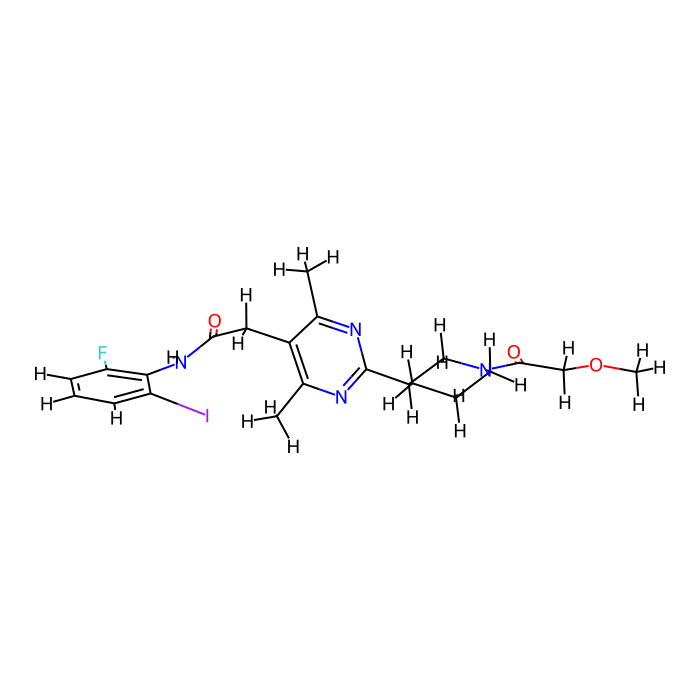

In [14]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

smiles_string = top_smile
# Generate 3D structure
# Your ML-generated SMILES string
# smiles_string = "O=C(c1ccc2ccoc2c1)N1CCC(C(=O)N2CCCC2)CC1"
mol = Chem.MolFromSmiles(smiles_string)
mol = Chem.AddHs(mol)

# Experiment with different parameters
AllChem.EmbedMolecule(mol, randomSeed=42)  # Try different seeds
AllChem.MMFFOptimizeMolecule(mol, maxIters=1000, nonBondedThresh=100.0)  # Adjust optimization parameters

# Visualize the 3D structure
img = Draw.MolToImage(mol, size=(700, 700))
display(img)


In [15]:
!pip install py3Dmol

from IPython.display import display, HTML
import py3Dmol
# Visualize the 3D structure
viewer = py3Dmol.view(width=400, height=400)
viewer.addModel(Chem.MolToMolBlock(mol), "mol")
viewer.setStyle({'stick': {}})
viewer.setBackgroundColor('white')
viewer.zoomTo()
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
# Save to SDF file
sdf_file = "output.sdf"
w_sdf = Chem.SDWriter(sdf_file)
w_sdf.write(mol)
w_sdf.close()


In [17]:
!pip install pandas matplotlib seaborn scikit-learn


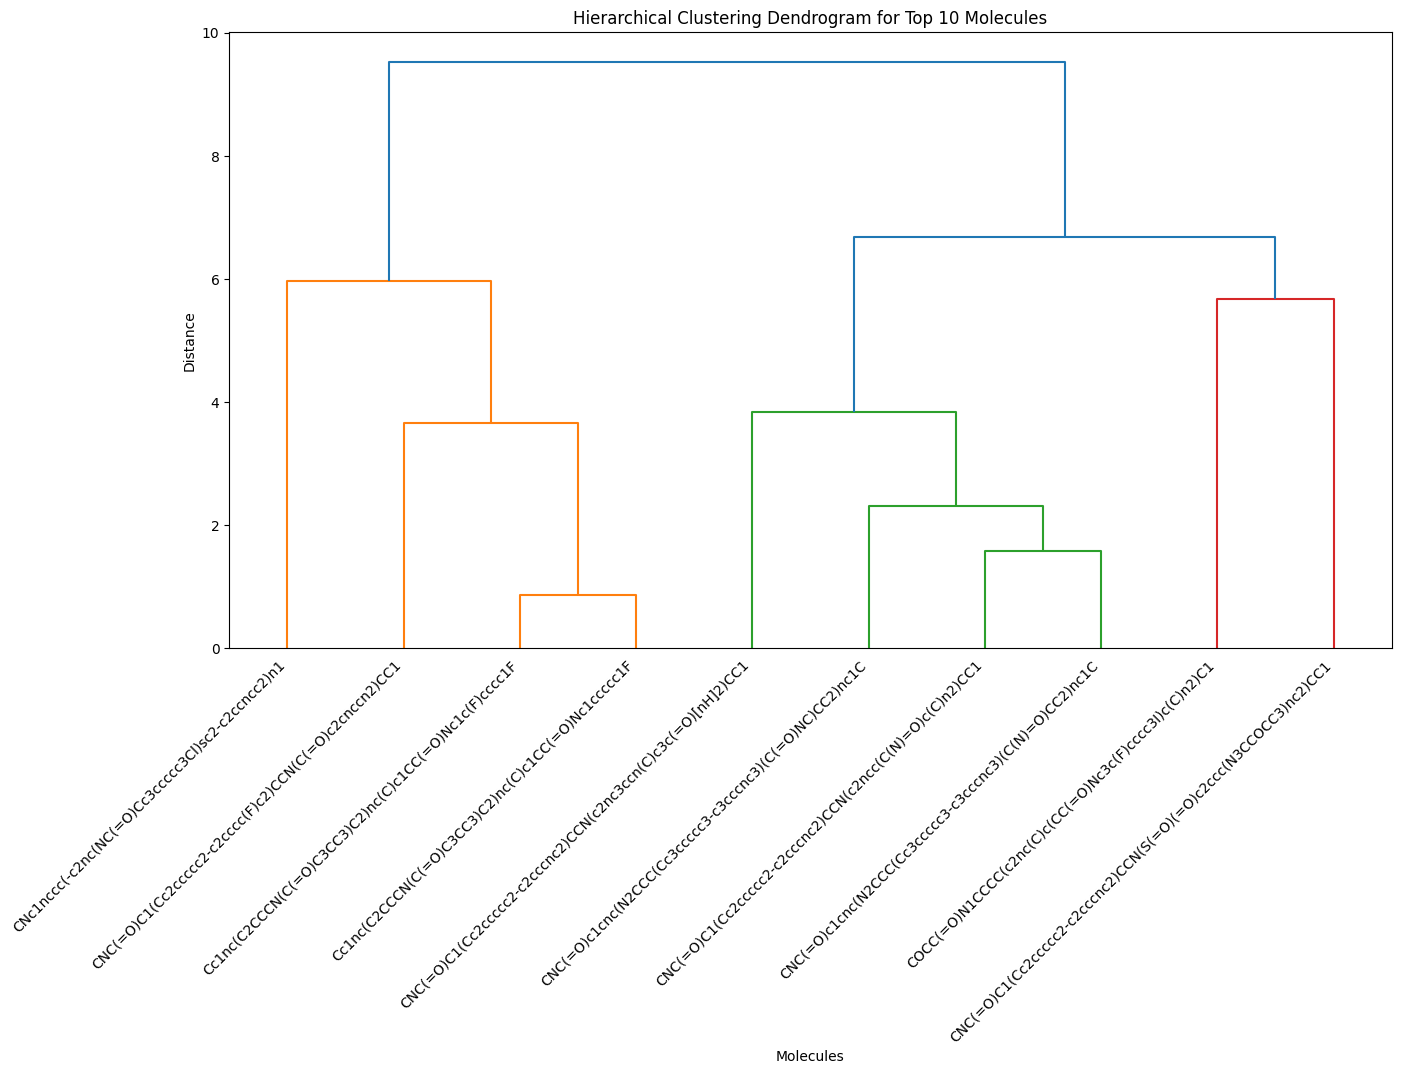


Cluster 1:
85    Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1c(F...
88    Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1ccc...
9     CNC(=O)C1(Cc2ccccc2-c2cccc(F)c2)CCN(C(=O)c2cnc...
80     CNc1nccc(-c2nc(NC(=O)Cc3ccccc3Cl)sc2-c2ccncc2)n1
Name: GeneratedSMILES, dtype: object

Average Values:
SimilarityToReference      0.244573
ESP                        0.484125
shape                      0.484141
MolecularWeight          427.100750
NumHDonors                 1.250000
NumHAcceptors              4.750000
TPSA                      79.565000
MolLogP                    3.807695
NumRotatableBonds          6.750000
NumRings                   4.000000
ClogP                      3.807695
MolarRefractivity        115.477000
dtype: float64

Cluster 2:
86    COCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3c(F)cccc3I)c(...
66    CNC(=O)C1(Cc2ccccc2-c2cccnc2)CCN(S(=O)(=O)c2cc...
Name: GeneratedSMILES, dtype: object

Average Values:
SimilarityToReference      0.243590
ESP                        0.401806
shape        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-18-132f247c32fd>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-18-132f247c32fd>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-18-132f247c32fd>:52: FutureWarning: The default value of numeric_only in DataFra

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Load data
data = pd.read_csv('MDWBS_LEAD_REF_output_data.csv')

# Select the top 10 molecules based on 'OverallSimilarityToReference'
top_10 = data.nlargest(10, 'OverallSimilarityToReference')

# Extract relevant features for clustering
features = top_10[['SimilarityToReference', 'ESP', 'shape', 'MolecularWeight', 'NumHDonors', 'NumHAcceptors',
                   'TPSA', 'MolLogP', 'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate pairwise distances
distances = pdist(scaled_features, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=top_10['GeneratedSMILES'].tolist(), orientation='top', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Molecules')
plt.xlabel('Molecules')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()

# Choose the number of clusters based on dendrogram or other criteria
num_clusters = 3  # Adjust as needed

# Perform clustering with AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
top_10['Cluster'] = cluster_model.fit_predict(scaled_features)

# Print the clustered molecules in the top 10
for cluster_id in range(num_clusters):
    cluster_data = top_10[top_10['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id + 1}:')
    print(cluster_data['GeneratedSMILES'])

    # Provide interpretation based on average values of features
    avg_values = cluster_data.mean()
    print('\nAverage Values:')
    print(avg_values[features.columns])
